## 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/Dacon/truck/'

In [3]:
import pandas as pd

train = pd.read_csv(path+'train_df.csv',encoding = 'cp949')
test = pd.read_csv(path+'test_df.csv',encoding = 'cp949')

submission = pd.read_csv(path+'sample_submission.csv')

In [4]:
train.head()

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,INVC_CONT
0,0,1129000014045300,5011000220046300,패션의류,상의,3
1,1,1135000009051200,5011000178037300,생활/건강,반려동물,3
2,2,1135000030093100,5011000265091400,패션의류,기타패션의류,9
3,3,1154500002014200,5011000315087400,식품,농산물,10
4,4,1165000021008300,5011000177051200,식품,가공식품,3


In [5]:
test.head()

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM
0,32000,5013000043028400,1165000021097200,식품,농산물
1,32001,5013000044016100,1154500002066400,식품,농산물
2,32002,5013000205030200,4139000102013200,식품,농산물
3,32003,5013000205030200,4221000040093400,식품,농산물
4,32004,5013000268011400,2726000004017100,식품,농산물


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          32000 non-null  int64 
 1   SEND_SPG_INNB  32000 non-null  int64 
 2   REC_SPG_INNB   32000 non-null  int64 
 3   DL_GD_LCLS_NM  32000 non-null  object
 4   DL_GD_MCLS_NM  32000 non-null  object
 5   INVC_CONT      32000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.5+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4640 entries, 0 to 4639
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          4640 non-null   int64 
 1   SEND_SPG_INNB  4640 non-null   int64 
 2   REC_SPG_INNB   4640 non-null   int64 
 3   DL_GD_LCLS_NM  4640 non-null   object
 4   DL_GD_MCLS_NM  4640 non-null   object
dtypes: int64(3), object(2)
memory usage: 181.4+ KB


In [8]:
train.isnull().sum()

index            0
SEND_SPG_INNB    0
REC_SPG_INNB     0
DL_GD_LCLS_NM    0
DL_GD_MCLS_NM    0
INVC_CONT        0
dtype: int64

## 데이터 전처리

In [ ]:
train

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,INVC_CONT
0,0,1129000014045300,5011000220046300,패션의류,상의,3
1,1,1135000009051200,5011000178037300,생활/건강,반려동물,3
2,2,1135000030093100,5011000265091400,패션의류,기타패션의류,9
3,3,1154500002014200,5011000315087400,식품,농산물,10
4,4,1165000021008300,5011000177051200,식품,가공식품,3
...,...,...,...,...,...,...
31995,31995,5011001060063300,2635000026053400,식품,농산물,6
31996,31996,5011001095042400,1168000017002200,식품,기타식품,5
31997,31997,5011001108036200,4119700008012100,식품,농산물,9
31998,31998,5011001115011400,1132000015085100,식품,농산물,3


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train.DL_GD_LCLS_NM)

LabelEncoder()

In [ ]:
le.classes_

array(['디지털/가전', '생활/건강', '식품', '여행/문화', '패션의류', '화장품/미용'], dtype=object)

In [ ]:
le = LabelEncoder()
le.fit(train.DL_GD_MCLS_NM)
le.classes_

array(['가공식품', '건강식품', '건강용품', '과자', '기타디지털/가전', '기타식품', '기타패션의류',
       '냉동/간편조리식품', '농산물', '문구/사무용품', '문화컨텐츠', '반려동물', '상의', '생활용품', '수산',
       '스킨케어', '음료', '음반', '주방용품', '축산'], dtype=object)

In [ ]:
le = LabelEncoder()
cat_cols = ['DL_GD_LCLS_NM', 'DL_GD_MCLS_NM']

In [ ]:
train_origin = train.copy()

In [ ]:
for i in cat_cols:
  train[i] = le.fit_transform(list(train[i]))

In [ ]:
train

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,INVC_CONT
0,0,1129000014045300,5011000220046300,4,12,3
1,1,1135000009051200,5011000178037300,1,11,3
2,2,1135000030093100,5011000265091400,4,6,9
3,3,1154500002014200,5011000315087400,2,8,10
4,4,1165000021008300,5011000177051200,2,0,3
...,...,...,...,...,...,...
31995,31995,5011001060063300,2635000026053400,2,8,6
31996,31996,5011001095042400,1168000017002200,2,5,5
31997,31997,5011001108036200,4119700008012100,2,8,9
31998,31998,5011001115011400,1132000015085100,2,8,3


In [ ]:
le.classes_

array(['가공식품', '건강식품', '건강용품', '과자', '기타디지털/가전', '기타식품', '기타패션의류',
       '냉동/간편조리식품', '농산물', '문구/사무용품', '문화컨텐츠', '반려동물', '상의', '생활용품', '수산',
       '스킨케어', '음료', '음반', '주방용품', '축산'], dtype='<U9')

In [ ]:
# 원핫 인코딩
train_one = pd.get_dummies(train)
test_one = pd.get_dummies(test)

In [ ]:
test_one

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM_디지털/가전,DL_GD_LCLS_NM_생활/건강,DL_GD_LCLS_NM_식품,DL_GD_LCLS_NM_여행/문화,DL_GD_LCLS_NM_패션의류,DL_GD_LCLS_NM_화장품/미용,DL_GD_MCLS_NM_가공식품,DL_GD_MCLS_NM_건강식품,DL_GD_MCLS_NM_건강용품,DL_GD_MCLS_NM_과자,DL_GD_MCLS_NM_기타디지털/가전,DL_GD_MCLS_NM_기타식품,DL_GD_MCLS_NM_기타패션의류,DL_GD_MCLS_NM_냉동/간편조리식품,DL_GD_MCLS_NM_농산물,DL_GD_MCLS_NM_문구/사무용품,DL_GD_MCLS_NM_문화컨텐츠,DL_GD_MCLS_NM_반려동물,DL_GD_MCLS_NM_상의,DL_GD_MCLS_NM_생활용품,DL_GD_MCLS_NM_수산,DL_GD_MCLS_NM_스킨케어,DL_GD_MCLS_NM_음료,DL_GD_MCLS_NM_음반,DL_GD_MCLS_NM_주방용품,DL_GD_MCLS_NM_축산
0,32000,5013000043028400,1165000021097200,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,32001,5013000044016100,1154500002066400,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,32002,5013000205030200,4139000102013200,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,32003,5013000205030200,4221000040093400,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,32004,5013000268011400,2726000004017100,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635,36635,5013000858004400,4725000719072200,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4636,36636,5013000870018300,2826000106075300,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4637,36637,5013000897086300,4311100034004300,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4638,36638,5013000902065100,4145000013011200,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


# EDA

In [9]:
train_one = train
test_one = test

In [10]:
# 5013000 0440 16100	
# 2635000 0260 53400
def split1(x) :
  return int(str(x['SEND_SPG_INNB'])[:7])
def split2(x) :
  return int(str(x['SEND_SPG_INNB'])[7:11])
def split3(x) :
  return int(str(x['SEND_SPG_INNB'])[11:])
def split4(x) :
  return int(str(x['REC_SPG_INNB'])[:7])
def split5(x) :
  return int(str(x['REC_SPG_INNB'])[7:11])
def split6(x) :
  return int(str(x['REC_SPG_INNB'])[11:])

train_one['send_1'] = train_one.apply(split1,axis=1)
train_one['send_2'] = train_one.apply(split2,axis=1)
train_one['send_3'] = train_one.apply(split3,axis=1)
train_one['rec_1'] = train_one.apply(split4,axis=1)
train_one['rec_2'] = train_one.apply(split5,axis=1)
train_one['rec_3'] = train_one.apply(split6,axis=1)

train_one

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,INVC_CONT,send_1,send_2,send_3,rec_1,rec_2,rec_3
0,0,1129000014045300,5011000220046300,패션의류,상의,3,1129000,140,45300,5011000,2200,46300
1,1,1135000009051200,5011000178037300,생활/건강,반려동물,3,1135000,90,51200,5011000,1780,37300
2,2,1135000030093100,5011000265091400,패션의류,기타패션의류,9,1135000,300,93100,5011000,2650,91400
3,3,1154500002014200,5011000315087400,식품,농산물,10,1154500,20,14200,5011000,3150,87400
4,4,1165000021008300,5011000177051200,식품,가공식품,3,1165000,210,8300,5011000,1770,51200
...,...,...,...,...,...,...,...,...,...,...,...,...
31995,31995,5011001060063300,2635000026053400,식품,농산물,6,5011001,600,63300,2635000,260,53400
31996,31996,5011001095042400,1168000017002200,식품,기타식품,5,5011001,950,42400,1168000,170,2200
31997,31997,5011001108036200,4119700008012100,식품,농산물,9,5011001,1080,36200,4119700,80,12100
31998,31998,5011001115011400,1132000015085100,식품,농산물,3,5011001,1150,11400,1132000,150,85100


In [11]:
test_one['send_1'] = test_one.apply(split1,axis=1)
test_one['send_2'] = test_one.apply(split2,axis=1)
test_one['send_3'] = test_one.apply(split3,axis=1)
test_one['rec_1'] = test_one.apply(split4,axis=1)
test_one['rec_2'] = test_one.apply(split5,axis=1)
test_one['rec_3'] = test_one.apply(split6,axis=1)

test_one

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,send_1,send_2,send_3,rec_1,rec_2,rec_3
0,32000,5013000043028400,1165000021097200,식품,농산물,5013000,430,28400,1165000,210,97200
1,32001,5013000044016100,1154500002066400,식품,농산물,5013000,440,16100,1154500,20,66400
2,32002,5013000205030200,4139000102013200,식품,농산물,5013000,2050,30200,4139000,1020,13200
3,32003,5013000205030200,4221000040093400,식품,농산물,5013000,2050,30200,4221000,400,93400
4,32004,5013000268011400,2726000004017100,식품,농산물,5013000,2680,11400,2726000,40,17100
...,...,...,...,...,...,...,...,...,...,...,...
4635,36635,5013000858004400,4725000719072200,식품,농산물,5013000,8580,4400,4725000,7190,72200
4636,36636,5013000870018300,2826000106075300,식품,농산물,5013000,8700,18300,2826000,1060,75300
4637,36637,5013000897086300,4311100034004300,식품,농산물,5013000,8970,86300,4311100,340,4300
4638,36638,5013000902065100,4145000013011200,식품,농산물,5013000,9020,65100,4145000,130,11200


In [52]:
str(train_one.send_1.nunique()) + ' ,'
str(train_one.send_2.nunique()) + ' ,'
str(train_one.send_3.nunique()) + ' ,'
str(train_one.rec_1.nunique()) + ' ,'
str(train_one.rec_2.nunique()) + ' ,'
str(train_one.rec_3.nunique())  #	send_2	send_3	rec_1	rec_2	rec_3

'400'

In [42]:
# 대-중분류별로 상품 종류 개수와 index개수
train_grp = train_one.groupby(['DL_GD_LCLS_NM','DL_GD_MCLS_NM'])['SEND_SPG_INNB'].nunique().reset_index(name='prd_send_cnt')
train_grp['prd_rec_cnt'] = (train_one.groupby(['DL_GD_LCLS_NM','DL_GD_MCLS_NM'])['REC_SPG_INNB'].nunique().reset_index(name='prd_rec_cnt')).prd_rec_cnt
train_grp['send_rec_mean'] = round(train_grp['prd_rec_cnt']/train_grp['prd_send_cnt'], 0)
train_grp['invc_sum'] = (train_one.groupby(['DL_GD_LCLS_NM','DL_GD_MCLS_NM'])['INVC_CONT'].sum().reset_index(name='invc_sum')).invc_sum
train_grp['invc_cnt'] = (train_one.groupby(['DL_GD_LCLS_NM','DL_GD_MCLS_NM'])['INVC_CONT'].count().reset_index(name='invc_cnt')).invc_cnt
train_grp['invc_mean'] = round(train_grp['invc_sum']/train_grp['invc_cnt'] ,0)
train_grp['invc_max'] = (train_one.groupby(['DL_GD_LCLS_NM','DL_GD_MCLS_NM'])['INVC_CONT'].max().reset_index(name='invc_max')).invc_max
train_grp['invc_min'] = (train_one.groupby(['DL_GD_LCLS_NM','DL_GD_MCLS_NM'])['INVC_CONT'].min().reset_index(name='invc_min')).invc_min
train_grp

,DL_GD_LCLS_NM,DL_GD_MCLS_NM,prd_send_cnt,prd_rec_cnt,send_rec_mean,invc_sum,invc_cnt,invc_mean,invc_max,invc_min
0,디지털/가전,기타디지털/가전,79,231,3.0,1578,241,7.0,103,3
1,생활/건강,건강용품,60,166,3.0,1802,176,10.0,130,3
2,생활/건강,문구/사무용품,72,167,2.0,1422,180,8.0,84,3
3,생활/건강,반려동물,74,335,5.0,1591,358,4.0,24,3
4,생활/건강,생활용품,106,328,3.0,1687,343,5.0,27,3
5,생활/건강,음반,7,635,91.0,2574,635,4.0,48,3
6,생활/건강,주방용품,147,304,2.0,1848,328,6.0,123,3
7,식품,가공식품,311,850,3.0,6283,923,7.0,150,3
8,식품,건강식품,183,608,3.0,3763,651,6.0,93,3
9,식품,과자,158,342,2.0,2007,348,6.0,70,3


In [31]:
train_grp2 = train_grp.groupby(['DL_GD_LCLS_NM'])['invc_sum'].sum().reset_index(name='lcls_invc_sum')
train_grp2['lcls_invc_cnt'] = (train_grp.groupby(['DL_GD_LCLS_NM'])['invc_cnt'].sum().reset_index(name='lcls_invc_cnt')).lcls_invc_cnt
train_grp2['invc_mean'] = round(train_grp2['lcls_invc_sum']/train_grp2['lcls_invc_cnt'] ,0)
train_grp2

,DL_GD_LCLS_NM,lcls_invc_sum,lcls_invc_cnt,invc_mean
0,디지털/가전,1578,241,7.0
1,생활/건강,10924,2020,5.0
2,식품,129209,27738,5.0
3,여행/문화,5911,1192,5.0
4,패션의류,3887,582,7.0
5,화장품/미용,1063,227,5.0


In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

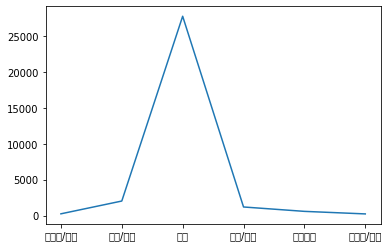

In [41]:
plt.plot(train_grp2['DL_GD_LCLS_NM'],train_grp2['lcls_invc_cnt'])

In [53]:
train

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,INVC_CONT,send_1,send_2,send_3,rec_1,rec_2,rec_3
0,0,1129000014045300,5011000220046300,패션의류,상의,3,1129000,140,45300,5011000,2200,46300
1,1,1135000009051200,5011000178037300,생활/건강,반려동물,3,1135000,90,51200,5011000,1780,37300
2,2,1135000030093100,5011000265091400,패션의류,기타패션의류,9,1135000,300,93100,5011000,2650,91400
3,3,1154500002014200,5011000315087400,식품,농산물,10,1154500,20,14200,5011000,3150,87400
4,4,1165000021008300,5011000177051200,식품,가공식품,3,1165000,210,8300,5011000,1770,51200
...,...,...,...,...,...,...,...,...,...,...,...,...
31995,31995,5011001060063300,2635000026053400,식품,농산물,6,5011001,600,63300,2635000,260,53400
31996,31996,5011001095042400,1168000017002200,식품,기타식품,5,5011001,950,42400,1168000,170,2200
31997,31997,5011001108036200,4119700008012100,식품,농산물,9,5011001,1080,36200,4119700,80,12100
31998,31998,5011001115011400,1132000015085100,식품,농산물,3,5011001,1150,11400,1132000,150,85100


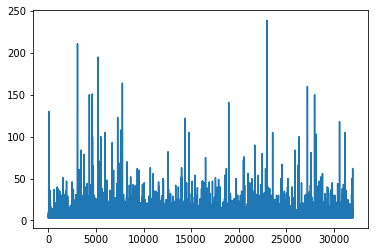

In [54]:
plt.plot(train['INVC_CONT'])

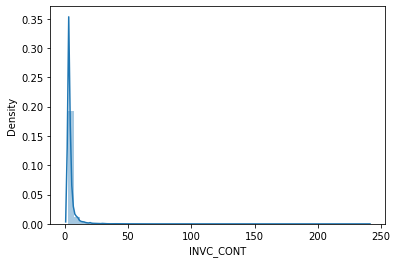

In [55]:
sns.distplot(train['INVC_CONT'])

plt.show()

In [56]:
train['INVC_CONT'].describe()

count    32000.000000
mean         4.767875
std          5.752122
min          3.000000
25%          3.000000
50%          3.000000
75%          5.000000
max        239.000000
Name: INVC_CONT, dtype: float64

## 모델링

In [ ]:
test_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4640 entries, 0 to 4639
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   index                    4640 non-null   int64
 1   SEND_SPG_INNB            4640 non-null   int64
 2   REC_SPG_INNB             4640 non-null   int64
 3   DL_GD_LCLS_NM_디지털/가전     4640 non-null   uint8
 4   DL_GD_LCLS_NM_생활/건강      4640 non-null   uint8
 5   DL_GD_LCLS_NM_식품         4640 non-null   uint8
 6   DL_GD_LCLS_NM_여행/문화      4640 non-null   uint8
 7   DL_GD_LCLS_NM_패션의류       4640 non-null   uint8
 8   DL_GD_LCLS_NM_화장품/미용     4640 non-null   uint8
 9   DL_GD_MCLS_NM_가공식품       4640 non-null   uint8
 10  DL_GD_MCLS_NM_건강식품       4640 non-null   uint8
 11  DL_GD_MCLS_NM_건강용품       4640 non-null   uint8
 12  DL_GD_MCLS_NM_과자         4640 non-null   uint8
 13  DL_GD_MCLS_NM_기타디지털/가전   4640 non-null   uint8
 14  DL_GD_MCLS_NM_기타식품       4640 non-null   uint8
 15  DL_G

In [ ]:
from lightgbm import LGBMRegressor

train_X = train_one.drop(['index','INVC_CONT','SEND_SPG_INNB','REC_SPG_INNB'],axis = 1)
train_Y = train_one['INVC_CONT']

#모델 정의
model = LGBMRegressor()

In [ ]:
# 모델 학습
model.fit(train_X,train_Y)

LGBMRegressor()

In [ ]:
# test 데이터 예측
test_fin = test_one.drop(['index','SEND_SPG_INNB','REC_SPG_INNB'],axis = 1)
pred = model.predict(test_fin)

## 정답파일 생성

In [ ]:
submission['INVC_CONT'] = pred

In [ ]:
submission.to_csv('submission1.csv',index = False)